<a href="https://colab.research.google.com/github/Chrstphr1995/BDA_Project/blob/main/Stock_Prices_%26_SMA_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Prices
Source: https://www.youtube.com/watch?v=d2kXmWzfS0w

# Microsoft

In [4]:
pip install alpha_vantage

     |████████████████████████████████| 1.3MB 8.0MB/s 
     |████████████████████████████████| 143kB 34.0MB/s 
     |████████████████████████████████| 296kB 46.9MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=623b6c1be2a87ce3f6fd38c0afd372fbc76fdc96f4fb084114db5cddc3c513a4
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


In [5]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time

In [6]:
api_key = "NMO1Y2U90QAJBJ2V"

In [7]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily(symbol='MSFT', outputsize = 'full')
print(data)

            1. open   2. high  3. low  4. close   5. volume
date                                                       
2020-12-30   225.23  225.6300  221.47    221.68  20272337.0
2020-12-29   226.31  227.1800  223.58    224.15  17403213.0
2020-12-28   224.45  226.0300  223.02    224.96  17762701.0
2020-12-24   221.42  223.6100  221.20    222.75  10550572.0
2020-12-23   223.11  223.5589  220.80    221.02  18699638.0
...             ...       ...     ...       ...         ...
1999-11-05    91.81   92.8700   90.50     91.56  35083700.0
1999-11-04    92.31   92.7500   90.31     91.75  27119700.0
1999-11-03    92.94   93.5000   91.50     92.00  22258500.0
1999-11-02    92.75   94.5000   91.94     92.56  23174500.0
1999-11-01    93.25   94.1900   92.12     92.37  26630600.0

[5326 rows x 5 columns]


In [8]:
i = 1
while i==1:
  data, meta_data = ts.get_daily(symbol='MSFT', outputsize = 'full')
  data.to_excel("Microsoft.xlsx")
  time.sleep(60)

KeyboardInterrupt: ignored

# Apple

In [9]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily(symbol='AAPL', outputsize = 'full')
print(data)

            1. open  2. high    3. low  4. close    5. volume
date                                                         
2020-12-30   135.58  135.990  133.4000    133.72   96452124.0
2020-12-29   138.05  138.789  134.3409    134.87  121047324.0
2020-12-28   133.99  137.340  133.5100    136.69  123124632.0
2020-12-24   131.32  133.460  131.1000    131.97   54930064.0
2020-12-23   132.16  132.430  130.7800    130.96   88223692.0
...             ...      ...       ...       ...          ...
1999-11-05    84.62   88.370   84.0000     88.31    3721500.0
1999-11-04    82.06   85.370   80.6200     83.62    3384700.0
1999-11-03    81.62   83.250   81.0000     81.50    2932700.0
1999-11-02    78.00   81.690   77.3100     80.25    3564600.0
1999-11-01    80.00   80.690   77.3700     77.62    2487300.0

[5326 rows x 5 columns]


In [ ]:
i = 1
while i==1:
  data, meta_data = ts.get_daily(symbol='AAPL', outputsize = 'full')
  data.to_excel("Apple.xlsx")
  time.sleep(60)

# How to trade on simple moving averages

https://www.youtube.com/watch?v=JJO9fKj3_u4

SMA = (Price1 + Price2 + PriceN) / PriceN

# SMA Microsoft

In [10]:
pip install pandas

In [11]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

In [12]:
api_key = "NMO1Y2U90QAJBJ2V"

In [13]:
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_intraday(symbol='MSFT', interval='1min', outputsize='full')

In [15]:
period = 60

In [16]:
ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_sma(symbol='MSFT', interval='1min',
                                   time_period=period, series_type='close')

In [17]:
df1 = data_ti

In [18]:
df2 = data_ts['4. close'].iloc[period-1::]

In [19]:
df2.index = df1.index

In [20]:
total_df = pd.concat([df1, df2], axis=1)

In [21]:
print(total_df)

                          SMA  4. close
date                                   
2020-12-17 07:47:00  220.0310    221.55
2020-12-17 07:49:00  220.0270    221.61
2020-12-17 07:54:00  220.0180    221.60
2020-12-17 07:55:00  220.0058    221.60
2020-12-17 07:56:00  219.9945    221.55
...                       ...       ...
2020-12-30 19:48:00  221.7283    220.51
2020-12-30 19:55:00  221.7342    220.60
2020-12-30 19:58:00  221.7383    220.73
2020-12-30 19:59:00  221.7425    220.50
2020-12-30 20:00:00  221.7465    220.18

[5117 rows x 2 columns]


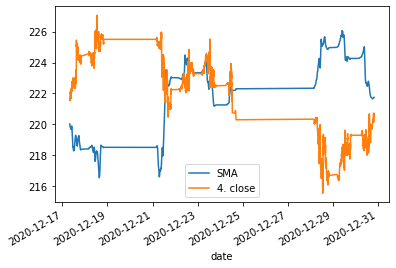

In [76]:
total_df.plot()
plt.show()

# SMA Test



In [32]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

In [33]:
api_key = "NMO1Y2U90QAJBJ2V"




Ursprünglicher Code: 

ts = TimeSeries(key=api_key, output_format='pandas')

data_ts, meta_data_ts = ts.get_intraday(symbol='MSFT', interval='1min', outputsize='full')

--> Intraday wurde in Daily umgewandelt, um die tagesaktuellen Kurse anstatt der minutenaktuellen Kurse zu erhalten

In [34]:
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full')




Ursprünglicher Code:

period = 60

In [ ]:
# period = 650

Ursprünglicher Code:

ti = TechIndicators(key=api_key, output_format='pandas')

data_ti, meta_data_ti = ti.get_sma(symbol='MSFT', interval='1min',
                                   time_period=period, series_type='close')

--> interval='1min' und time_period=period wurde entfernt, um nicht die minutenaktuellen Kurse anzuzeigen, sondern die tagesaktuellen

In [35]:
ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_sma(symbol='MSFT', series_type='close')

In [36]:
df1 = data_ti




Ab hier geht es normal mit dem Code weiter, der die Kurse anzeigt (siehe Beispiel Microsoft weiter oben). Das wurde weggelassen, weil der SMA bereits im bisherigen Code vorhanden ist.

Mit der Funktion print(data_ti) wird die Liste der tagesgenauen SMA dargestellt.

In [37]:
print(data_ti)

                 SMA
date                
1999-11-29   28.5130
1999-11-30   28.4920
1999-12-01   28.5020
1999-12-02   28.5468
1999-12-03   28.6165
...              ...
2020-12-23  216.1200
2020-12-24  216.5640
2020-12-28  217.0505
2020-12-29  217.5545
2020-12-30  217.8280

[5307 rows x 1 columns]





Mit diesem Code wird der SMA in eine Excel Liste importiert (genau wie die Aktienkurse)

In [ ]:
i = 1
while i==1:
  data_ti, meta_data_ti = ti.get_sma(symbol='MSFT', series_type='close')
  data_ti.to_csv("Microsoft_SMA.csv")
  time.sleep(60)

In [ ]:
df1 = data_ti, meta_data_ti

# Schlusskurs vs. SMA

In [23]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

In [24]:
api_key = "NMO1Y2U90QAJBJ2V"

In [25]:
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full')

In [26]:
ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_sma(symbol='MSFT', series_type='4. close')

In [27]:
df1 = data_ti, meta_data_ti
df2 = data_ts['4. close']

In [28]:
print(df1)

(                 SMA
date                
1999-11-29   28.1104
1999-11-30   28.0696
1999-12-01   28.0525
1999-12-02   28.0744
1999-12-03   28.1608
...              ...
2020-12-23  214.0295
2020-12-24  214.4665
2020-12-28  214.9155
2020-12-29  215.5527
2020-12-30  215.9587

[5307 rows x 1 columns], {'1: Symbol': 'MSFT', '2: Indicator': 'Simple Moving Average (SMA)', '3: Last Refreshed': '2020-12-30', '4: Interval': 'daily', '5: Time Period': 20, '6: Series Type': '4. close', '7: Time Zone': 'US/Eastern'})


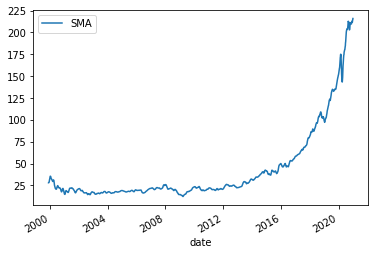

In [29]:
data_ti.plot()
plt.show()

In [30]:
print(data_ts['4. close'])

date
2020-12-30    221.68
2020-12-29    224.15
2020-12-28    224.96
2020-12-24    222.75
2020-12-23    221.02
               ...  
1999-11-05     91.56
1999-11-04     91.75
1999-11-03     92.00
1999-11-02     92.56
1999-11-01     92.37
Name: 4. close, Length: 5326, dtype: float64


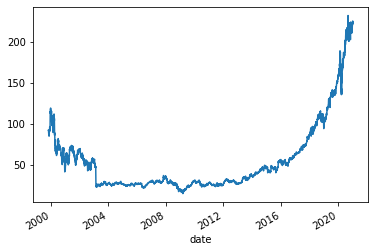

In [77]:
#plt.figure(figsize=(20,10))
data_ts['4. close'].plot()
plt.show()

# Test

In [91]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go

In [92]:
df = pd.read_csv('/content/Microsoft_SMA.csv')

In [93]:
fig = go.Figure([go.Scatter(x=df['date'], y=df['SMA'])])
fig.show()

In [94]:
import plotly.express as px
import pandas as pd

df = pd.read_csv('/content/Microsoft_SMA.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['SMA'])])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()